# Framingham Heart Study #

The "Framingham" heart disease dataset includes over 4,238 records,16 columns and 15 attributes. 

The goal of the dataset is to predict whether the patient has 10-year risk of future (CHD) coronary heart disease

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# read in the data
framingham_data = pd.read_csv('framingham.csv')

In [7]:
# check data
framingham_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
len(framingham_data)

4238

## Explaining Dataset ##

In [5]:
framingham_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


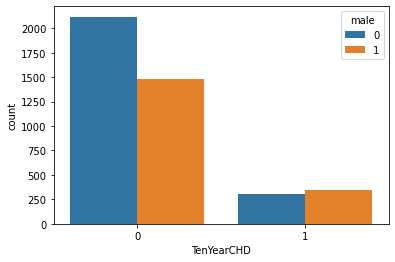

In [13]:
# countplot developing CHD in 10 years by gender
sns.countplot(x = 'TenYearCHD', data=framingham_data, hue='male')
plt.show()

In [14]:
# check for null values in the data
framingham_data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

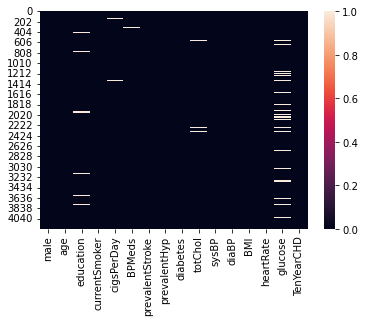

In [16]:
# visualize null values
sns.heatmap(framingham_data.isna())
plt.show()

In [17]:
# find the % of null values in education column
framingham_data['education'].isna().sum() / len(framingham_data) * 100

2.4775837659273243

In [18]:
# find the % of null values in glucose column
framingham_data['glucose'].isna().sum() / len(framingham_data) * 100

9.155261915998112

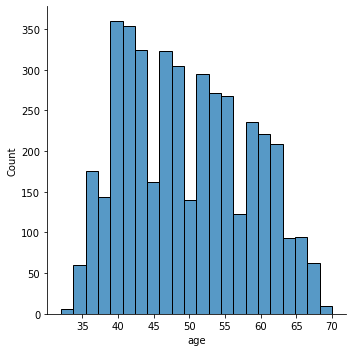

In [20]:
sns.displot(x = 'age', data=framingham_data)
plt.show()

# Data Cleaning #

Fill the missing values with average value since missing data is negligible

In [25]:
# fill education column
framingham_data['education'].fillna(framingham_data['education'].mean(), inplace = True)
framingham_data['glucose'].fillna(framingham_data['glucose'].mean(), inplace = True)
framingham_data['cigsPerDay'].fillna(framingham_data['cigsPerDay'].mean(), inplace = True)
framingham_data['BPMeds'].fillna(framingham_data['BPMeds'].mean(), inplace = True)
framingham_data['totChol'].fillna(framingham_data['totChol'].mean(), inplace = True)
framingham_data['BMI'].fillna(framingham_data['BMI'].mean(), inplace = True)
framingham_data['heartRate'].fillna(framingham_data['heartRate'].mean(), inplace = True)

In [26]:
framingham_data.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

# Data Modelling #

Building Model using Logistic Regression

In [29]:
# Separate Dependent and Independent Variables
x = framingham_data[['male','age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = framingham_data['TenYearCHD']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [32]:
# import Logistic Regression package
from sklearn.linear_model import LogisticRegression

In [33]:
# Fit Logistic Regression
lr = LogisticRegression()

In [34]:
lr.fit(x_train, y_train)

/Users/lucieschulz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# predict
prediction = lr.predict(x_test)

# Testing #

In [37]:
# print confusion matrix
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, prediction), columns=['Predicted No', 'Predicted Yes'], index = ['Actual No', 'Actual Yes'])

,Predicted No,Predicted Yes
Actual No,1190,4
Actual Yes,195,10


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1194
           1       0.71      0.05      0.09       205

    accuracy                           0.86      1399
   macro avg       0.79      0.52      0.51      1399
weighted avg       0.84      0.86      0.80      1399

